<a href="https://colab.research.google.com/github/shreya-rawal/notebooks/blob/main/analyzing_programming_languages_stack_overflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Programming Language Popularity Analysis using Stack Overflow Data

Stack Overflow contains a wealth of programming-related data, including questions, answers, and tags associated with different programming languages.<br>

We will create a data pipeline that scrapes programming language tag data from Stack Overflow, performs an analysis to determine the popularity of different programming languages, and presents the findings through visualizations.

## WEB SCRAPING

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://stackoverflow.com/tags"

In [3]:
html_data = requests.get(url) #get the contents of the tags page


In [4]:
html_data.status_code

200

In [5]:
html_data = html_data.text

In [6]:
soup = BeautifulSoup(html_data, "html.parser")

In [7]:
#a dictionary to store tag names as key, and the no of questions corresponding to each tag as value
tag_questions = {}

#find all tag elements

tag_elements = soup.find_all("a", class_="post-tag")
tag_number = soup.find_all(class_="mt-auto d-flex jc-space-between fs-caption fc-black-400")

In [8]:
extract = int(tag_number[0].text.split('\n')[1].split(" ")[0])
tag_elements[0].text

'javascript'

In [9]:
for i in range(len(tag_elements)):
  tag_questions[tag_elements[i].text] = int(tag_number[i].text.split('\n')[1].split(" ")[0])

In [10]:
tag_questions

{'javascript': 2509634,
 'python': 2159798,
 'java': 1905314,
 'c#': 1600561,
 'php': 1461470,
 'android': 1409143,
 'html': 1179682,
 'jquery': 1034454,
 'c++': 798374,
 'css': 797227,
 'ios': 682997,
 'sql': 664657,
 'mysql': 661154,
 'r': 496020,
 'node.js': 466515,
 'reactjs': 464748,
 'arrays': 414553,
 'c': 398793,
 'asp.net': 373674,
 'json': 357798,
 'python-3.x': 340817,
 'ruby-on-rails': 337285,
 '.net': 333598,
 'sql-server': 331718,
 'swift': 329671,
 'django': 308808,
 'angular': 298954,
 'objective-c': 292467,
 'pandas': 282575,
 'excel': 281606,
 'angularjs': 262790,
 'regex': 258840,
 'ruby': 228351,
 'linux': 225999,
 'ajax': 221909,
 'iphone': 221363}

In [11]:
#we can filter out some non-programming languages
tag_questions.pop("iphone")

221363

In [12]:
tag_questions

{'javascript': 2509634,
 'python': 2159798,
 'java': 1905314,
 'c#': 1600561,
 'php': 1461470,
 'android': 1409143,
 'html': 1179682,
 'jquery': 1034454,
 'c++': 798374,
 'css': 797227,
 'ios': 682997,
 'sql': 664657,
 'mysql': 661154,
 'r': 496020,
 'node.js': 466515,
 'reactjs': 464748,
 'arrays': 414553,
 'c': 398793,
 'asp.net': 373674,
 'json': 357798,
 'python-3.x': 340817,
 'ruby-on-rails': 337285,
 '.net': 333598,
 'sql-server': 331718,
 'swift': 329671,
 'django': 308808,
 'angular': 298954,
 'objective-c': 292467,
 'pandas': 282575,
 'excel': 281606,
 'angularjs': 262790,
 'regex': 258840,
 'ruby': 228351,
 'linux': 225999,
 'ajax': 221909}

In [13]:
#arrange in order decreasing order to determine most popular
tag_questions = dict(sorted(tag_questions.items(), key=lambda item: item[1]))

In [14]:
tag_questions

{'ajax': 221909,
 'linux': 225999,
 'ruby': 228351,
 'regex': 258840,
 'angularjs': 262790,
 'excel': 281606,
 'pandas': 282575,
 'objective-c': 292467,
 'angular': 298954,
 'django': 308808,
 'swift': 329671,
 'sql-server': 331718,
 '.net': 333598,
 'ruby-on-rails': 337285,
 'python-3.x': 340817,
 'json': 357798,
 'asp.net': 373674,
 'c': 398793,
 'arrays': 414553,
 'reactjs': 464748,
 'node.js': 466515,
 'r': 496020,
 'mysql': 661154,
 'sql': 664657,
 'ios': 682997,
 'css': 797227,
 'c++': 798374,
 'jquery': 1034454,
 'html': 1179682,
 'android': 1409143,
 'php': 1461470,
 'c#': 1600561,
 'java': 1905314,
 'python': 2159798,
 'javascript': 2509634}

In [15]:
most_popular_language = list(tag_questions.keys())[len(tag_questions)-1]
no_of_tags_most_popular = list(tag_questions.values())[len(tag_questions) -1]

In [16]:
most_popular_language

'javascript'

In [17]:
no_of_tags_most_popular

2509634

## Visualization using matplotlib, seaborn

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

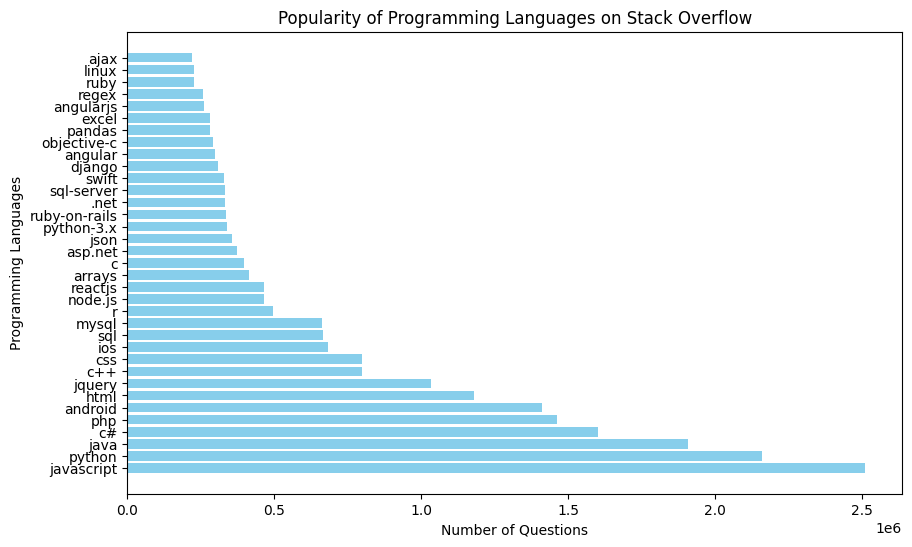

In [19]:
plt.figure(figsize=(10,6))
plt.figure(figsize=(10, 6))
plt.barh(list(tag_questions.keys()), list(tag_questions.values()), color='skyblue')
plt.xlabel('Number of Questions')
plt.ylabel('Programming Languages')
plt.title('Popularity of Programming Languages on Stack Overflow')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()

Using Seaborn for visualization:

In [20]:
#convert dictionary into dataframe for easier use with seaborn
import pandas as pd
df = pd.DataFrame.from_dict(tag_questions, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Language'}, inplace=True)

In [29]:
color_dict = {}
for i in df['Language']:
  if i == most_popular_language:
    color_dict[i]= "pink"
  else:
    color_dict[i]= "skyblue"

{'ajax': 'skyblue',
 'linux': 'skyblue',
 'ruby': 'skyblue',
 'regex': 'skyblue',
 'angularjs': 'skyblue',
 'excel': 'skyblue',
 'pandas': 'skyblue',
 'objective-c': 'skyblue',
 'angular': 'skyblue',
 'django': 'skyblue',
 'swift': 'skyblue',
 'sql-server': 'skyblue',
 '.net': 'skyblue',
 'ruby-on-rails': 'skyblue',
 'python-3.x': 'skyblue',
 'json': 'skyblue',
 'asp.net': 'skyblue',
 'c': 'skyblue',
 'arrays': 'skyblue',
 'reactjs': 'skyblue',
 'node.js': 'skyblue',
 'r': 'skyblue',
 'mysql': 'skyblue',
 'sql': 'skyblue',
 'ios': 'skyblue',
 'css': 'skyblue',
 'c++': 'skyblue',
 'jquery': 'skyblue',
 'html': 'skyblue',
 'android': 'skyblue',
 'php': 'skyblue',
 'c#': 'skyblue',
 'java': 'skyblue',
 'python': 'skyblue',
 'javascript': 'pink'}

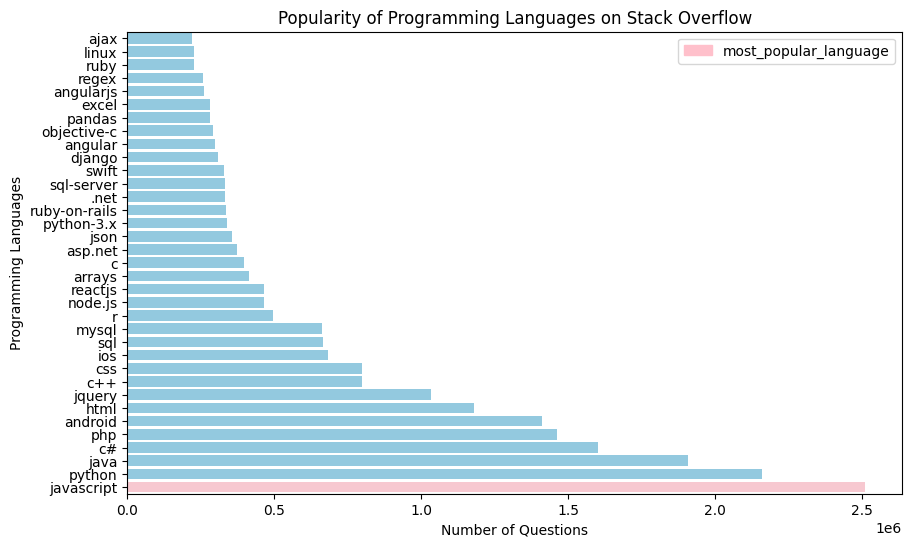

In [33]:
# Create a bar plot using Seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Language', data=df, palette=color_dict)
plt.xlabel('Number of Questions')
plt.ylabel('Programming Languages')
plt.title('Popularity of Programming Languages on Stack Overflow')

#create a legend to highlight the most popular programming language
from matplotlib.patches import Patch
legend = [Patch(color=color_dict[most_popular_language], label="most_popular_language")]
plt.legend(handles=legend)

plt.show()